In [19]:
# Library imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Dropout

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [20]:
# Load the dataset
df = pd.read_csv('./survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [22]:
# Missing value check
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [23]:
# Duplicate data check
print(df.duplicated().sum())

33


In [24]:
data = df.copy()

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

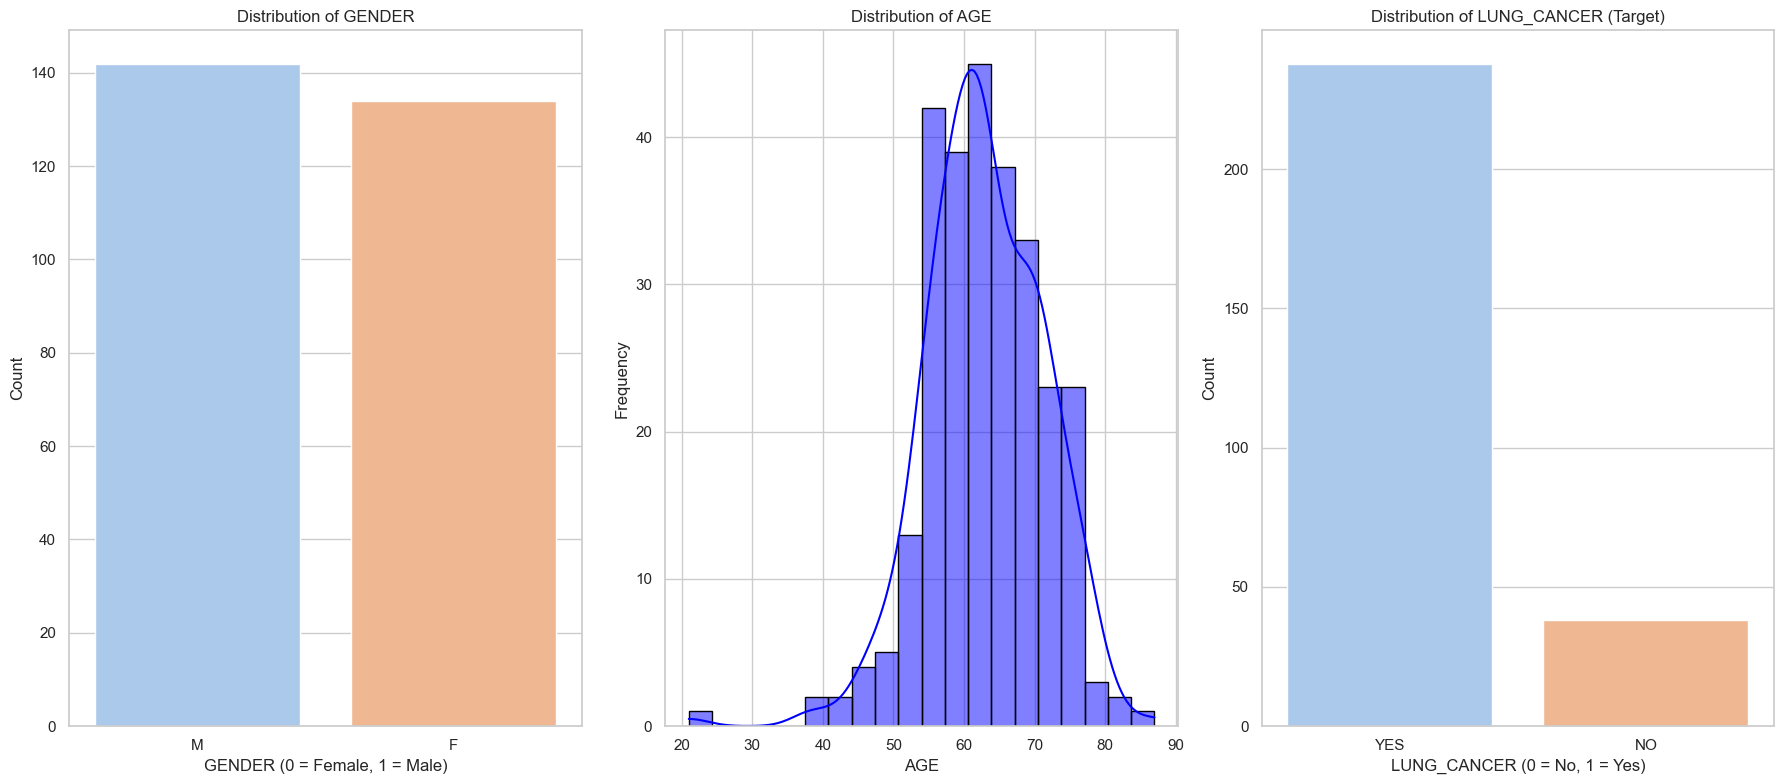

In [27]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of GENDER, AGE and LUNG_CANCER
plt.figure(figsize=(18, 8))

# Distribution of GENDER
plt.subplot(1, 3, 1)
sns.countplot(x='GENDER', data=data, palette='pastel', hue='GENDER')
plt.title("Distribution of GENDER")
plt.xlabel("GENDER (0 = Female, 1 = Male)")
plt.ylabel("Count")

# AGE distribution
plt.subplot(1, 3, 2)
sns.histplot(data['AGE'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.ylabel("Frequency")

# LUNG_CANCER distribution
plt.subplot(1, 3, 3)
sns.countplot(x='LUNG_CANCER', data=data, palette='pastel', hue='LUNG_CANCER')
plt.title("Distribution of LUNG_CANCER (Target)")
plt.xlabel("LUNG_CANCER (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [28]:
# Encode categorical columns
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

# Normalisasi fitur numerik dengan MinMaxScaler
scaler = MinMaxScaler()
numerical_features = data.drop(columns=["LUNG_CANCER"]).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the normalized features
pd.DataFrame(data, columns=data.columns).head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,0.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
3,1.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
4,0.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0


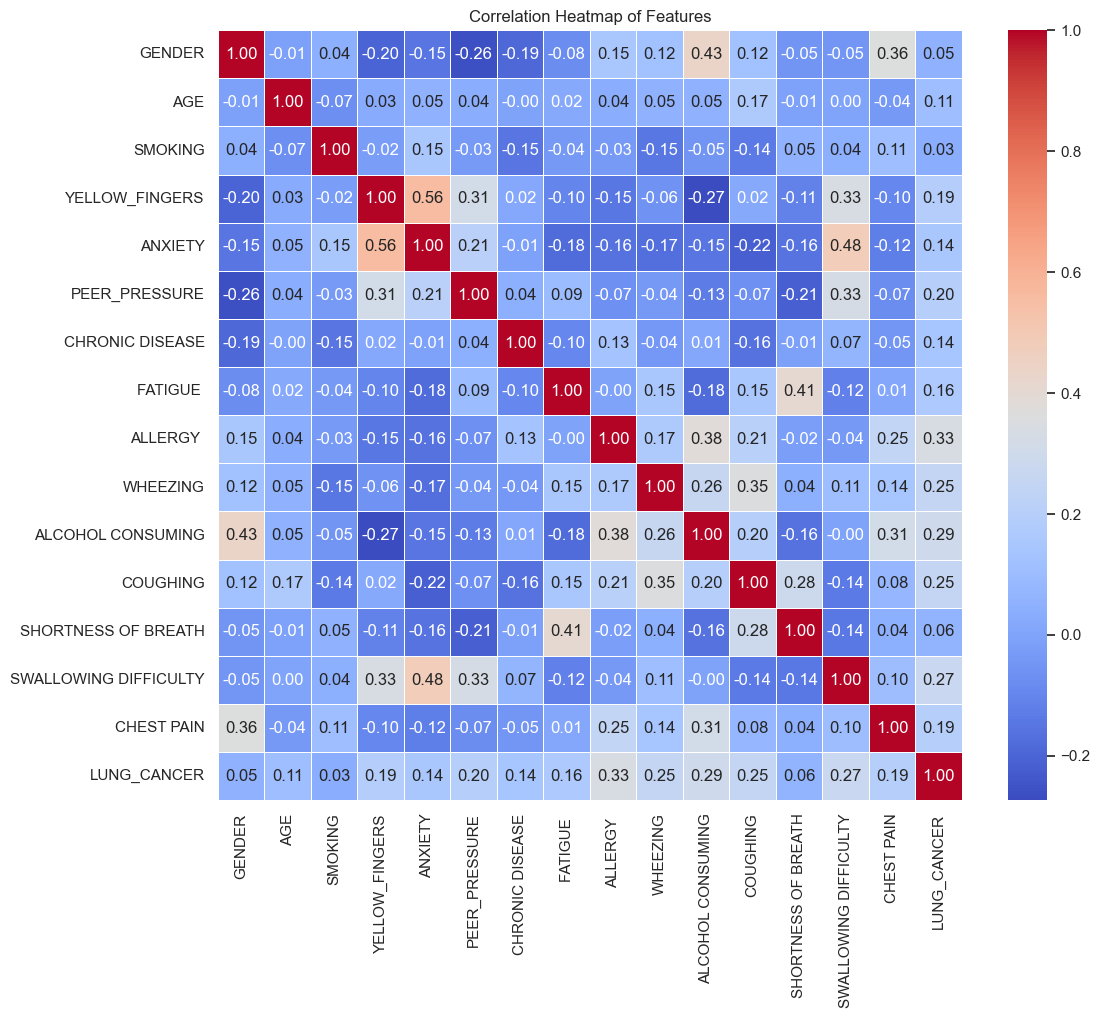

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(data, columns=data.columns).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [30]:
# Data splitting

# Pisahkan fitur dan target
X = data.drop(columns=["LUNG_CANCER"])
y = data["LUNG_CANCER"]

# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220, 15), (56, 15), (220,), (56,))

In [31]:
# Modelling

# Membuat model RNN
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Input layer
    SimpleRNN(32, activation='tanh'), # RNN layer
    Dropout(0.2), # Mengurangi overfitting dengan mematikan 20% neuron
    Dense(16, activation='tanh'), # Memproses hasil dari layer RNN
    Dense(1, activation='sigmoid')  # Output untuk klasifikasi biner
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Train Model RNN

# Reshape data untuk RNN (tambahkan dimensi untuk waktu)
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Melatih model
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

In [33]:
# Evaluasi RNN

# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Mendapatkan prediksi dari model
y_pred_prob = model.predict(X_test_rnn)  # Prediksi probabilitas
y_pred = (y_pred_prob > 0.5).astype(int)  # Konversi ke label biner (0 atau 1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Laporan klasifikasi lengkap
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

Test Loss: 0.3789428770542145, Test Accuracy: 0.8928571343421936
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
Confusion Matrix:
[[ 4  4]
 [ 2 46]]
Precision: 0.92
Recall: 0.9583333333333334
F1 Score: 0.9387755102040817


In [34]:
# Model Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediksi
y_pred_lr = log_reg.predict(X_test)

# Evaluasi Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# print("Logistic Regression Evaluation:")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Precision: 0.9215686274509803
Recall: 0.9791666666666666
F1 Score: 0.9494949494949495


In [35]:
# Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb_model.predict(X_test)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Evaluasi Naive Bayes
# print("Naive Bayes Evaluation:")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Precision: 0.92
Recall: 0.9583333333333334
F1 Score: 0.9387755102040817


In [37]:
model.save('./rnn_lung_cancer_model.keras')